In [39]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

print(mouse_drug_df.head())
print(clinical_trial_df.head())


# Combine the data into a single dataset
merged_df = pd.merge(mouse_drug_df, clinical_trial_df, on="Mouse ID")

# Display the data table for preview
merged_df.head()


  Mouse ID      Drug
0     f234  Stelasyn
1     x402  Stelasyn
2     a492  Stelasyn
3     w540  Stelasyn
4     v764  Stelasyn
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [40]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grp_tumor_vol = merged_df.groupby(['Drug', 'Timepoint'])
#print(grp_tumor_vol.head())

tumor_vol = grp_tumor_vol['Tumor Volume (mm3)'].mean()
#print (tumor_vol.head())

# Convert to DataFrame
mean_tumor_vol_df = pd.DataFrame({"Drug": [i[0] for i in grp_tumor_vol['Drug'].unique()],
                            "Timepoint": [i[0] for i in  grp_tumor_vol['Timepoint'].unique()],
                             "Tumor Volume (mm3)": tumor_vol
                            })



#set index
mean_tumor_vol_df.reset_index(inplace=True,drop=True)


# Preview DataFrame
mean_tumor_vol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [41]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vol_grps = [tumor_vol for name, tumor_vol in grp_tumor_vol['Tumor Volume (mm3)']]
tumor_vol_grps

standard_error = [sem(s) for s in tumor_vol_grps ]
standard_error

# Convert to DataFrame
sem_tumor_vol_df = pd.DataFrame({"Drug": [i[0] for i in grp_tumor_vol['Drug'].unique()],
                            "Timepoint": [i[0] for i in  grp_tumor_vol['Timepoint'].unique()],
                             "Tumor Volume (mm3)": standard_error
                            })



#set index
sem_tumor_vol_df.reset_index(inplace=True,drop=True)


# Preview DataFrame
sem_tumor_vol_df.head() 

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [92]:
new_df = mean_tumor_vol_df[['Drug','Timepoint','Tumor Volume (mm3)']].copy()

pivot_mean_tumor_vol_df = new_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

pivot_mean_tumor_vol_df.head(20)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [98]:
pivot_sem_tumor_vol_df = sem_tumor_vol_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

pivot_sem_tumor_vol_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


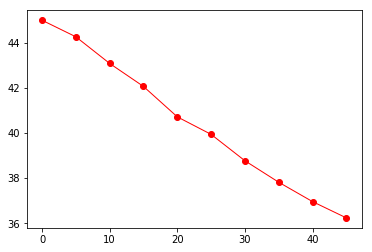

<ErrorbarContainer object of 3 artists>

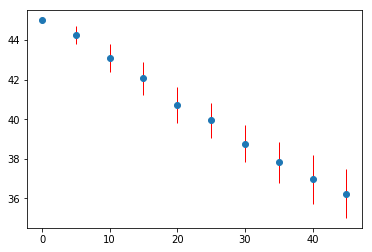

In [105]:
#fig, axc = plt.subplots()

#axc.errorbar(pivot_mean_tumor_vol_df.index, 
##             pivot_mean_tumor_vol_df['Capomulin'],
#            yerr=pivot_sem_tumor_vol_df['Capomulin'],
#            fmt="o",
#            ecolor="red",
#            elinewidth=1
#            )



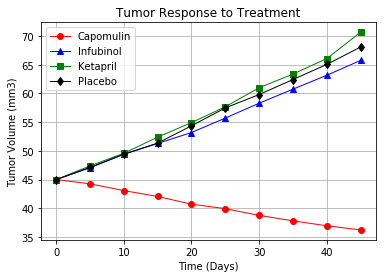

In [112]:
# Generate the Plot (with Error Bars)
 
capomulin, = plt.plot(pivot_mean_tumor_vol_df.index,
                     pivot_mean_tumor_vol_df['Capomulin'],
                     marker="o",
                      color="red",
                      linewidth=1,
                      label="Capomulin"
                     )

infubinol,  = plt.plot(pivot_mean_tumor_vol_df.index,
                     pivot_mean_tumor_vol_df['Infubinol'],
                      marker="^",
                      color="blue",
                      linewidth=1,
                      label="Infubinol"
                     )

ketapril,  = plt.plot(pivot_mean_tumor_vol_df.index,
                     pivot_mean_tumor_vol_df['Ketapril'],
                      marker="s",
                      color="green",
                      linewidth=1,
                      label="Ketapril"
                     )


placebo,  = plt.plot(pivot_mean_tumor_vol_df.index,
                     pivot_mean_tumor_vol_df['Placebo'],
                      marker="d",
                      color="black",
                      linewidth=1,
                      label="Placebo"
                     )


#axc.errorbar(pivot_mean_tumor_vol_df.index, 
#            pivot_mean_tumor_vol_df['Capomulin'],
#            yerr=pivot_sem_tumor_vol_df['Capomulin'],
#            fmt="o"           
#            )



# gridlines
plt.grid(axis='both')


#create a legend 
plt.legend(handles=[capomulin, infubinol, ketapril, placebo], loc="best")

#titles
plt.title("Tumor Response to Treatment")


# Create labels for the X and Y axis
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")


# Save the Figure
plt.savefig("Images/TumorResponseToTreatment.png")

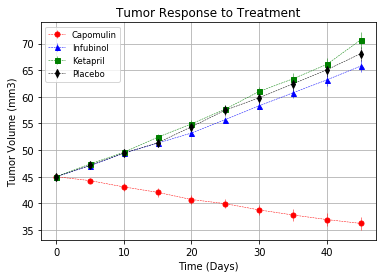

In [5]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


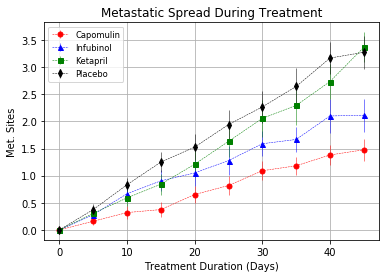

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

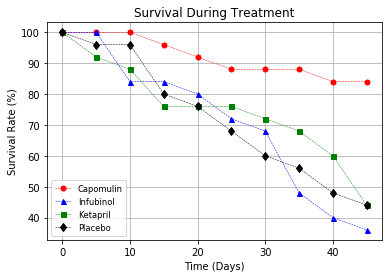

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

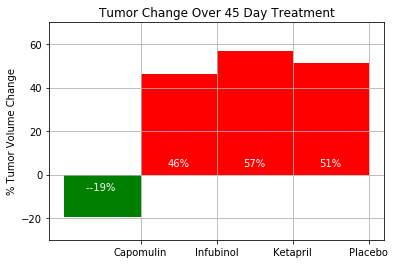